In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re

In [2]:
data=pd.read_csv("C:\\Users\\anupa\\OneDrive - vit.ac.in\\Notebooks\\PROJECTS\\SET\\SURVEY ON INDIAN EDUCATION SYSTEM.csv")

In [3]:
df=pd.DataFrame(data)

In [4]:
# Create new pandas DataFrame.
df2 = df[["What made you choose this course(program)?"]]
df2.head()

,What made you choose this course(program)?
0,My interest in Mathematics and Physics.
1,It's a high paying job
2,Passion and partly ambition
3,The interest to exploremore in this field
4,I din't get MBBS seat


In [5]:
# Step 1: Cleaning the text
# Define a function to clean the text
def clean(text):
# Removes all special characters and numericals leaving the alphabets
    text = re.sub('[^A-Za-z]+', ' ', text)
    return text

# Cleaning the text in the review column
df2['Cleaned Reviews'] = df2["What made you choose this course(program)?"].apply(clean)
print(df2['Cleaned Reviews'])


0        My interest in Mathematics and Physics 
1                         It s a high paying job
2                    Passion and partly ambition
3      The interest to exploremore in this field
4                          I din t get MBBS seat
                         ...                    
141                                     Passion 
142                  Passion towards the subject
143                                       Demand
144                                 My interest 
145                 Growth in Data related jobs 
Name: Cleaned Reviews, Length: 146, dtype: object


<ipython-input-5-01929e3867f2>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['Cleaned Reviews'] = df2["What made you choose this course(program)?"].apply(clean)


In [6]:
# Step 2: Tokenization
import nltk
nltk.download('punkt')
from nltk.tokenize import word_tokenize
from nltk import pos_tag
nltk.download('stopwords')
from nltk.corpus import stopwords
nltk.download('wordnet')
from nltk.corpus import wordnet

import nltk
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\anupa\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\anupa\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\anupa\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\anupa\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


True

In [7]:
get_ipython().system('pip install -U textblob')

In [8]:
# POS tagger dictionary

from textblob import TextBlob

pos_dict = {'J':wordnet.ADJ, 'V':wordnet.VERB, 'N':wordnet.NOUN, 'R':wordnet.ADV}
def pos_tagger(sentence):
    sent = TextBlob(sentence)
    tag_dict = {"J": 'a', "N": 'n', "V": 'v', "R": 'r'}
    words_tags = [(w, tag_dict.get(pos[0], 'n')) for w, pos in sent.tags]   
    lemma_list = [wd.lemmatize(tag) for wd, tag in words_tags]
    return lemma_list

In [9]:
df2['POS tagged'] = df2['Cleaned Reviews'].apply(pos_tagger)
print(df2['POS tagged'])

def token_stop_pos(list1):
    tags=pos_tag(list1)
    newlist = []
    for word, tag in tags :
        if word.lower() not in set(stopwords.words('english')):
            newlist.append(tuple([word, pos_dict.get(tag[0])]))
    return newlist

df2['POS stopword']=df2['POS tagged'].apply(token_stop_pos)
print(df2['POS stopword'])

<ipython-input-9-43a10399ae26>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['POS tagged'] = df2['Cleaned Reviews'].apply(pos_tagger)


0          [My, interest, in, Mathematics, and, Physics]
1                             [It, s, a, high, pay, job]
2                       [Passion, and, partly, ambition]
3      [The, interest, to, exploremore, in, this, field]
4                           [I, din, t, get, MBBS, seat]
                             ...                        
141                                            [Passion]
142                     [Passion, towards, the, subject]
143                                             [Demand]
144                                       [My, interest]
145                      [Growth, in, Data, relate, job]
Name: POS tagged, Length: 146, dtype: object
0      [(interest, n), (Mathematics, n), (Physics, n)]
1                      [(high, a), (pay, n), (job, n)]
2           [(Passion, n), (partly, r), (ambition, n)]
3        [(interest, n), (exploremore, v), (field, n)]
4           [(din, v), (get, n), (MBBS, n), (seat, n)]
                            ...                      

<ipython-input-9-43a10399ae26>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['POS stopword']=df2['POS tagged'].apply(token_stop_pos)


In [10]:
from nltk.stem import WordNetLemmatizer
wordnet_lemmatizer = WordNetLemmatizer()
def lemmatize(pos_data):
    lemma_rew = " "
    for word, pos in pos_data:
        if not pos:
            lemma = word
            lemma_rew = lemma_rew + " " + lemma
        else:
            lemma = wordnet_lemmatizer.lemmatize(word, pos=pos)
            lemma_rew = lemma_rew + " " + lemma
    return lemma_rew

df2['Lemma'] = df2['POS stopword'].apply(lemmatize)
df2.head()

<ipython-input-10-5fc106740a5a>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['Lemma'] = df2['POS stopword'].apply(lemmatize)


,What made you choose this course(program)?,Cleaned Reviews,POS tagged,POS stopword,Lemma
0,My interest in Mathematics and Physics.,My interest in Mathematics and Physics,"[My, interest, in, Mathematics, and, Physics]","[(interest, n), (Mathematics, n), (Physics, n)]",interest Mathematics Physics
1,It's a high paying job,It s a high paying job,"[It, s, a, high, pay, job]","[(high, a), (pay, n), (job, n)]",high pay job
2,Passion and partly ambition,Passion and partly ambition,"[Passion, and, partly, ambition]","[(Passion, n), (partly, r), (ambition, n)]",Passion partly ambition
3,The interest to exploremore in this field,The interest to exploremore in this field,"[The, interest, to, exploremore, in, this, field]","[(interest, n), (exploremore, v), (field, n)]",interest exploremore field
4,I din't get MBBS seat,I din t get MBBS seat,"[I, din, t, get, MBBS, seat]","[(din, v), (get, n), (MBBS, n), (seat, n)]",din get MBBS seat


In [11]:
def getSubjectivity(text):
    return TextBlob(text).sentiment.subjectivity 
 #Create a function to get the polarity
def getPolarity(text):
    return TextBlob(text).sentiment.polarity
   #Create two new columns ‘Subjectivity’ & ‘Polarity’
df2['TextBlob_Subjectivity'] =  df2['Lemma'].apply(getSubjectivity)
df2['TextBlob_Polarity'] = df2['Lemma'].apply(getPolarity)
def getAnalysis(score):
    if score < 0:
        return 'Negative'
    elif score == 0:
        return 'Neutral'
    else:
        return 'Positive'
df2['TextBlob_Analysis'] = df2['TextBlob_Polarity'].apply(getAnalysis )
df2.head() 

<ipython-input-11-1e2748cd6fee>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['TextBlob_Subjectivity'] =  df2['Lemma'].apply(getSubjectivity)
<ipython-input-11-1e2748cd6fee>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['TextBlob_Polarity'] = df2['Lemma'].apply(getPolarity)
<ipython-input-11-1e2748cd6fee>:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: 

,What made you choose this course(program)?,Cleaned Reviews,POS tagged,POS stopword,Lemma,TextBlob_Subjectivity,TextBlob_Polarity,TextBlob_Analysis
0,My interest in Mathematics and Physics.,My interest in Mathematics and Physics,"[My, interest, in, Mathematics, and, Physics]","[(interest, n), (Mathematics, n), (Physics, n)]",interest Mathematics Physics,0.00,0.00,Neutral
1,It's a high paying job,It s a high paying job,"[It, s, a, high, pay, job]","[(high, a), (pay, n), (job, n)]",high pay job,0.54,0.16,Positive
2,Passion and partly ambition,Passion and partly ambition,"[Passion, and, partly, ambition]","[(Passion, n), (partly, r), (ambition, n)]",Passion partly ambition,0.00,0.00,Neutral
3,The interest to exploremore in this field,The interest to exploremore in this field,"[The, interest, to, exploremore, in, this, field]","[(interest, n), (exploremore, v), (field, n)]",interest exploremore field,0.00,0.00,Neutral
4,I din't get MBBS seat,I din t get MBBS seat,"[I, din, t, get, MBBS, seat]","[(din, v), (get, n), (MBBS, n), (seat, n)]",din get MBBS seat,0.00,0.00,Neutral


In [12]:
def getSubjectivity(text):
    return TextBlob(text).sentiment.subjectivity 
 #Create a function to get the polarity
def getPolarity(text):
    return TextBlob(text).sentiment.polarity
   #Create two new columns ‘Subjectivity’ & ‘Polarity’
df2['TextBlob_Subjectivity'] =  df2['Lemma'].apply(getSubjectivity)
df2['TextBlob_Polarity'] = df2['Lemma'].apply(getPolarity)
def getAnalysis(score):
    if score < 0:
        return 'Negative'
    elif score == 0:
        return 'Neutral'
    else:
        return 'Positive'
df2['TextBlob_Analysis'] = df2['TextBlob_Polarity'].apply(getAnalysis )
df2.head() 

<ipython-input-12-1e2748cd6fee>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['TextBlob_Subjectivity'] =  df2['Lemma'].apply(getSubjectivity)
<ipython-input-12-1e2748cd6fee>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['TextBlob_Polarity'] = df2['Lemma'].apply(getPolarity)
<ipython-input-12-1e2748cd6fee>:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: 

,What made you choose this course(program)?,Cleaned Reviews,POS tagged,POS stopword,Lemma,TextBlob_Subjectivity,TextBlob_Polarity,TextBlob_Analysis
0,My interest in Mathematics and Physics.,My interest in Mathematics and Physics,"[My, interest, in, Mathematics, and, Physics]","[(interest, n), (Mathematics, n), (Physics, n)]",interest Mathematics Physics,0.00,0.00,Neutral
1,It's a high paying job,It s a high paying job,"[It, s, a, high, pay, job]","[(high, a), (pay, n), (job, n)]",high pay job,0.54,0.16,Positive
2,Passion and partly ambition,Passion and partly ambition,"[Passion, and, partly, ambition]","[(Passion, n), (partly, r), (ambition, n)]",Passion partly ambition,0.00,0.00,Neutral
3,The interest to exploremore in this field,The interest to exploremore in this field,"[The, interest, to, exploremore, in, this, field]","[(interest, n), (exploremore, v), (field, n)]",interest exploremore field,0.00,0.00,Neutral
4,I din't get MBBS seat,I din t get MBBS seat,"[I, din, t, get, MBBS, seat]","[(din, v), (get, n), (MBBS, n), (seat, n)]",din get MBBS seat,0.00,0.00,Neutral


In [13]:
tb_counts=df2['TextBlob_Analysis'].value_counts()
print(tb_counts)

Neutral     98
Positive    32
Negative    16
Name: TextBlob_Analysis, dtype: int64


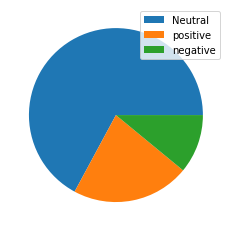

In [14]:
plt.pie(tb_counts)
plt.legend(['Neutral','positive','negative'])
plt.show()

In [15]:
df3=df2.copy()
print(df3.head())

  What made you choose this course(program)?  \
0   My interest in Mathematics and Physics.    
1                    It's  a high paying job   
2                Passion and partly ambition   
3  The interest to exploremore in this field   
4                      I din't get MBBS seat   

                             Cleaned Reviews  \
0    My interest in Mathematics and Physics    
1                     It s a high paying job   
2                Passion and partly ambition   
3  The interest to exploremore in this field   
4                      I din t get MBBS seat   

                                          POS tagged  \
0      [My, interest, in, Mathematics, and, Physics]   
1                         [It, s, a, high, pay, job]   
2                   [Passion, and, partly, ambition]   
3  [The, interest, to, exploremore, in, this, field]   
4                       [I, din, t, get, MBBS, seat]   

                                      POS stopword  \
0  [(interest, n), (Mathematics

In [16]:
pip install vaderSentiment

Note: you may need to restart the kernel to use updated packages.


In [17]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()
# function to calculate vader sentiment
def vadersentimentanalysis(review):
    vs = analyzer.polarity_scores(review)
    return vs['compound']
df3['Vader Sentiment'] = df3["What made you choose this course(program)?"].apply(vadersentimentanalysis)
# function to analyse
def vader_analysis(compound):
    if compound >= 0.5:
        return 'Positive'
    elif compound <= -0.5 :
        return 'Negative'
    else:
        return 'Neutral'
df3['Vader Analysis'] = df3['Vader Sentiment'].apply(vader_analysis)
df3.head()

,What made you choose this course(program)?,Cleaned Reviews,POS tagged,POS stopword,Lemma,TextBlob_Subjectivity,TextBlob_Polarity,TextBlob_Analysis,Vader Sentiment,Vader Analysis
0,My interest in Mathematics and Physics.,My interest in Mathematics and Physics,"[My, interest, in, Mathematics, and, Physics]","[(interest, n), (Mathematics, n), (Physics, n)]",interest Mathematics Physics,0.00,0.00,Neutral,0.4588,Neutral
1,It's a high paying job,It s a high paying job,"[It, s, a, high, pay, job]","[(high, a), (pay, n), (job, n)]",high pay job,0.54,0.16,Positive,0.0000,Neutral
2,Passion and partly ambition,Passion and partly ambition,"[Passion, and, partly, ambition]","[(Passion, n), (partly, r), (ambition, n)]",Passion partly ambition,0.00,0.00,Neutral,0.4588,Neutral
3,The interest to exploremore in this field,The interest to exploremore in this field,"[The, interest, to, exploremore, in, this, field]","[(interest, n), (exploremore, v), (field, n)]",interest exploremore field,0.00,0.00,Neutral,0.4588,Neutral
4,I din't get MBBS seat,I din t get MBBS seat,"[I, din, t, get, MBBS, seat]","[(din, v), (get, n), (MBBS, n), (seat, n)]",din get MBBS seat,0.00,0.00,Neutral,0.0000,Neutral


In [18]:
vader_counts = df3['Vader Analysis'].value_counts()
vader_counts

Neutral     124
Positive     22
Name: Vader Analysis, dtype: int64

In [19]:
nltk.download('sentiwordnet')
from nltk.corpus import sentiwordnet as swn
def sentiwordnetanalysis(pos_data):
    sentiment = 0
    tokens_count = 0
    for word, pos in pos_data:
        if not pos:
            continue
        lemma = wordnet_lemmatizer.lemmatize(word, pos=pos)
        if not lemma:
            continue
        synsets = wordnet.synsets(lemma, pos=pos)
        if not synsets:
            continue
            # Take the first sense, the most common
        synset = synsets[0]
        swn_synset = swn.senti_synset(synset.name())
        sentiment += swn_synset.pos_score() - swn_synset.neg_score()
        tokens_count += 1
        print(swn_synset.pos_score(),swn_synset.neg_score(),swn_synset.obj_score())
        if not tokens_count:
            return 0
        if sentiment>0:
            return "Positive"
        if sentiment==0:
            return "Neutral"
        else:
            return "Negative"


[nltk_data] Downloading package sentiwordnet to
[nltk_data]     C:\Users\anupa\AppData\Roaming\nltk_data...
[nltk_data]   Package sentiwordnet is already up-to-date!


In [20]:
df3['SWN analysis'] = df3['POS stopword'].apply(sentiwordnetanalysis)

0.0 0.0 1.0
0.125 0.25 0.625
0.5 0.0 0.5
0.0 0.0 1.0
0.0 0.0 1.0
0.375 0.375 0.25
0.0 0.0 1.0
0.0 0.0 1.0
0.625 0.0 0.375
0.0 0.0 1.0
0.0 0.0 1.0
0.0 0.0 1.0
0.25 0.0 0.75
0.0 0.625 0.375
0.0 0.625 0.375
0.5 0.0 0.5
0.375 0.625 0.0
0.0 0.0 1.0
0.0 0.0 1.0
0.125 0.0 0.875
0.0 0.0 1.0
0.25 0.0 0.75
0.0 0.0 1.0
0.0 0.0 1.0
0.0 0.0 1.0
0.25 0.0 0.75
0.0 0.0 1.0
0.0 0.0 1.0
0.0 0.0 1.0
0.0 0.0 1.0
0.0 0.0 1.0
0.5 0.0 0.5
0.0 0.0 1.0
0.0 0.0 1.0
0.0 0.0 1.0
0.0 0.0 1.0
0.0 0.0 1.0
0.125 0.0 0.875
0.5 0.0 0.5
0.0 0.0 1.0
0.5 0.0 0.5
0.0 0.0 1.0
0.0 0.0 1.0
0.5 0.0 0.5
0.0 0.0 1.0
0.0 0.0 1.0
0.0 0.0 1.0
0.0 0.0 1.0
0.0 0.0 1.0
0.0 0.0 1.0
0.125 0.0 0.875
0.0 0.0 1.0
0.0 0.0 1.0
0.75 0.0 0.25
0.5 0.0 0.5
0.75 0.0 0.25
0.0 0.0 1.0
0.5 0.0 0.5
0.375 0.625 0.0
0.0 0.0 1.0
0.0 0.0 1.0
0.0 0.125 0.875
0.0 0.0 1.0
0.625 0.0 0.375
0.0 0.0 1.0
0.0 0.0 1.0
0.0 0.0 1.0
0.0 0.0 1.0
0.0 0.0 1.0
0.0 0.0 1.0
0.0 0.0 1.0
0.375 0.25 0.375
0.0 0.0 1.0
0.125 0.25 0.625
0.625 0.0 0.375
0.125 0.0 0.875
0.0 0.0 1.

In [21]:
swn_counts= df3['SWN analysis'].value_counts()
swn_counts

Neutral     97
Positive    39
Negative     9
Name: SWN analysis, dtype: int64

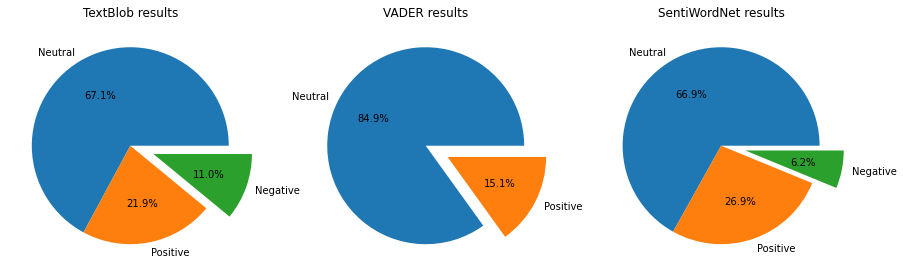

In [22]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.figure(figsize=(15,7))
plt.subplot(1,3,1)
plt.title("TextBlob results")
plt.pie(tb_counts.values, labels = tb_counts.index, explode = (0, 0, 0.25), autopct='%1.1f%%', shadow=False)
plt.subplot(1,3,2)
plt.title("VADER results")
plt.pie(vader_counts.values, labels = vader_counts.index, explode = (0, 0.25), autopct='%1.1f%%', shadow=False)
plt.subplot(1,3,3)
plt.title("SentiWordNet results")
plt.pie(swn_counts.values, labels = swn_counts.index, explode = (0, 0, 0.25), autopct='%1.1f%%', shadow=False)
plt.show()